# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

The primary objective of the analysis is to understand the factors that influence the pricing of used cars. By analyzing the dataset, the goal is to identify key features or characteristics of used cars that contribute to higher or lower prices.The analysis will focus on a dataset containing information on 426,000 used cars. The dataset includes various attributes such as the car's year of manufacture, make and model, condition, odometer reading, fuel type, transmission type, and more. Data preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features will be necessary to prepare the data for modeling.
 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2]:
## Import required  libraries    for data processing
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the data and print information 
df = pd.read_csv("data/vehicles.csv", low_memory=False)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl


In [4]:
## Find out the min, max 
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


### Data Analysis`
Looking at the above charts We can infer that
Most Cars are manufactured in year 2000 and afterwords
Most cars are with clean title
Most cars in good or excellent condition
Most cars have less than or equal to 8 cyllinders
Most cars are SUV, Sedan or Pickup/Truck
Most cars have odomter in 20000-30000
Most cars have fuel type as gas
Most cars have automatic transmission



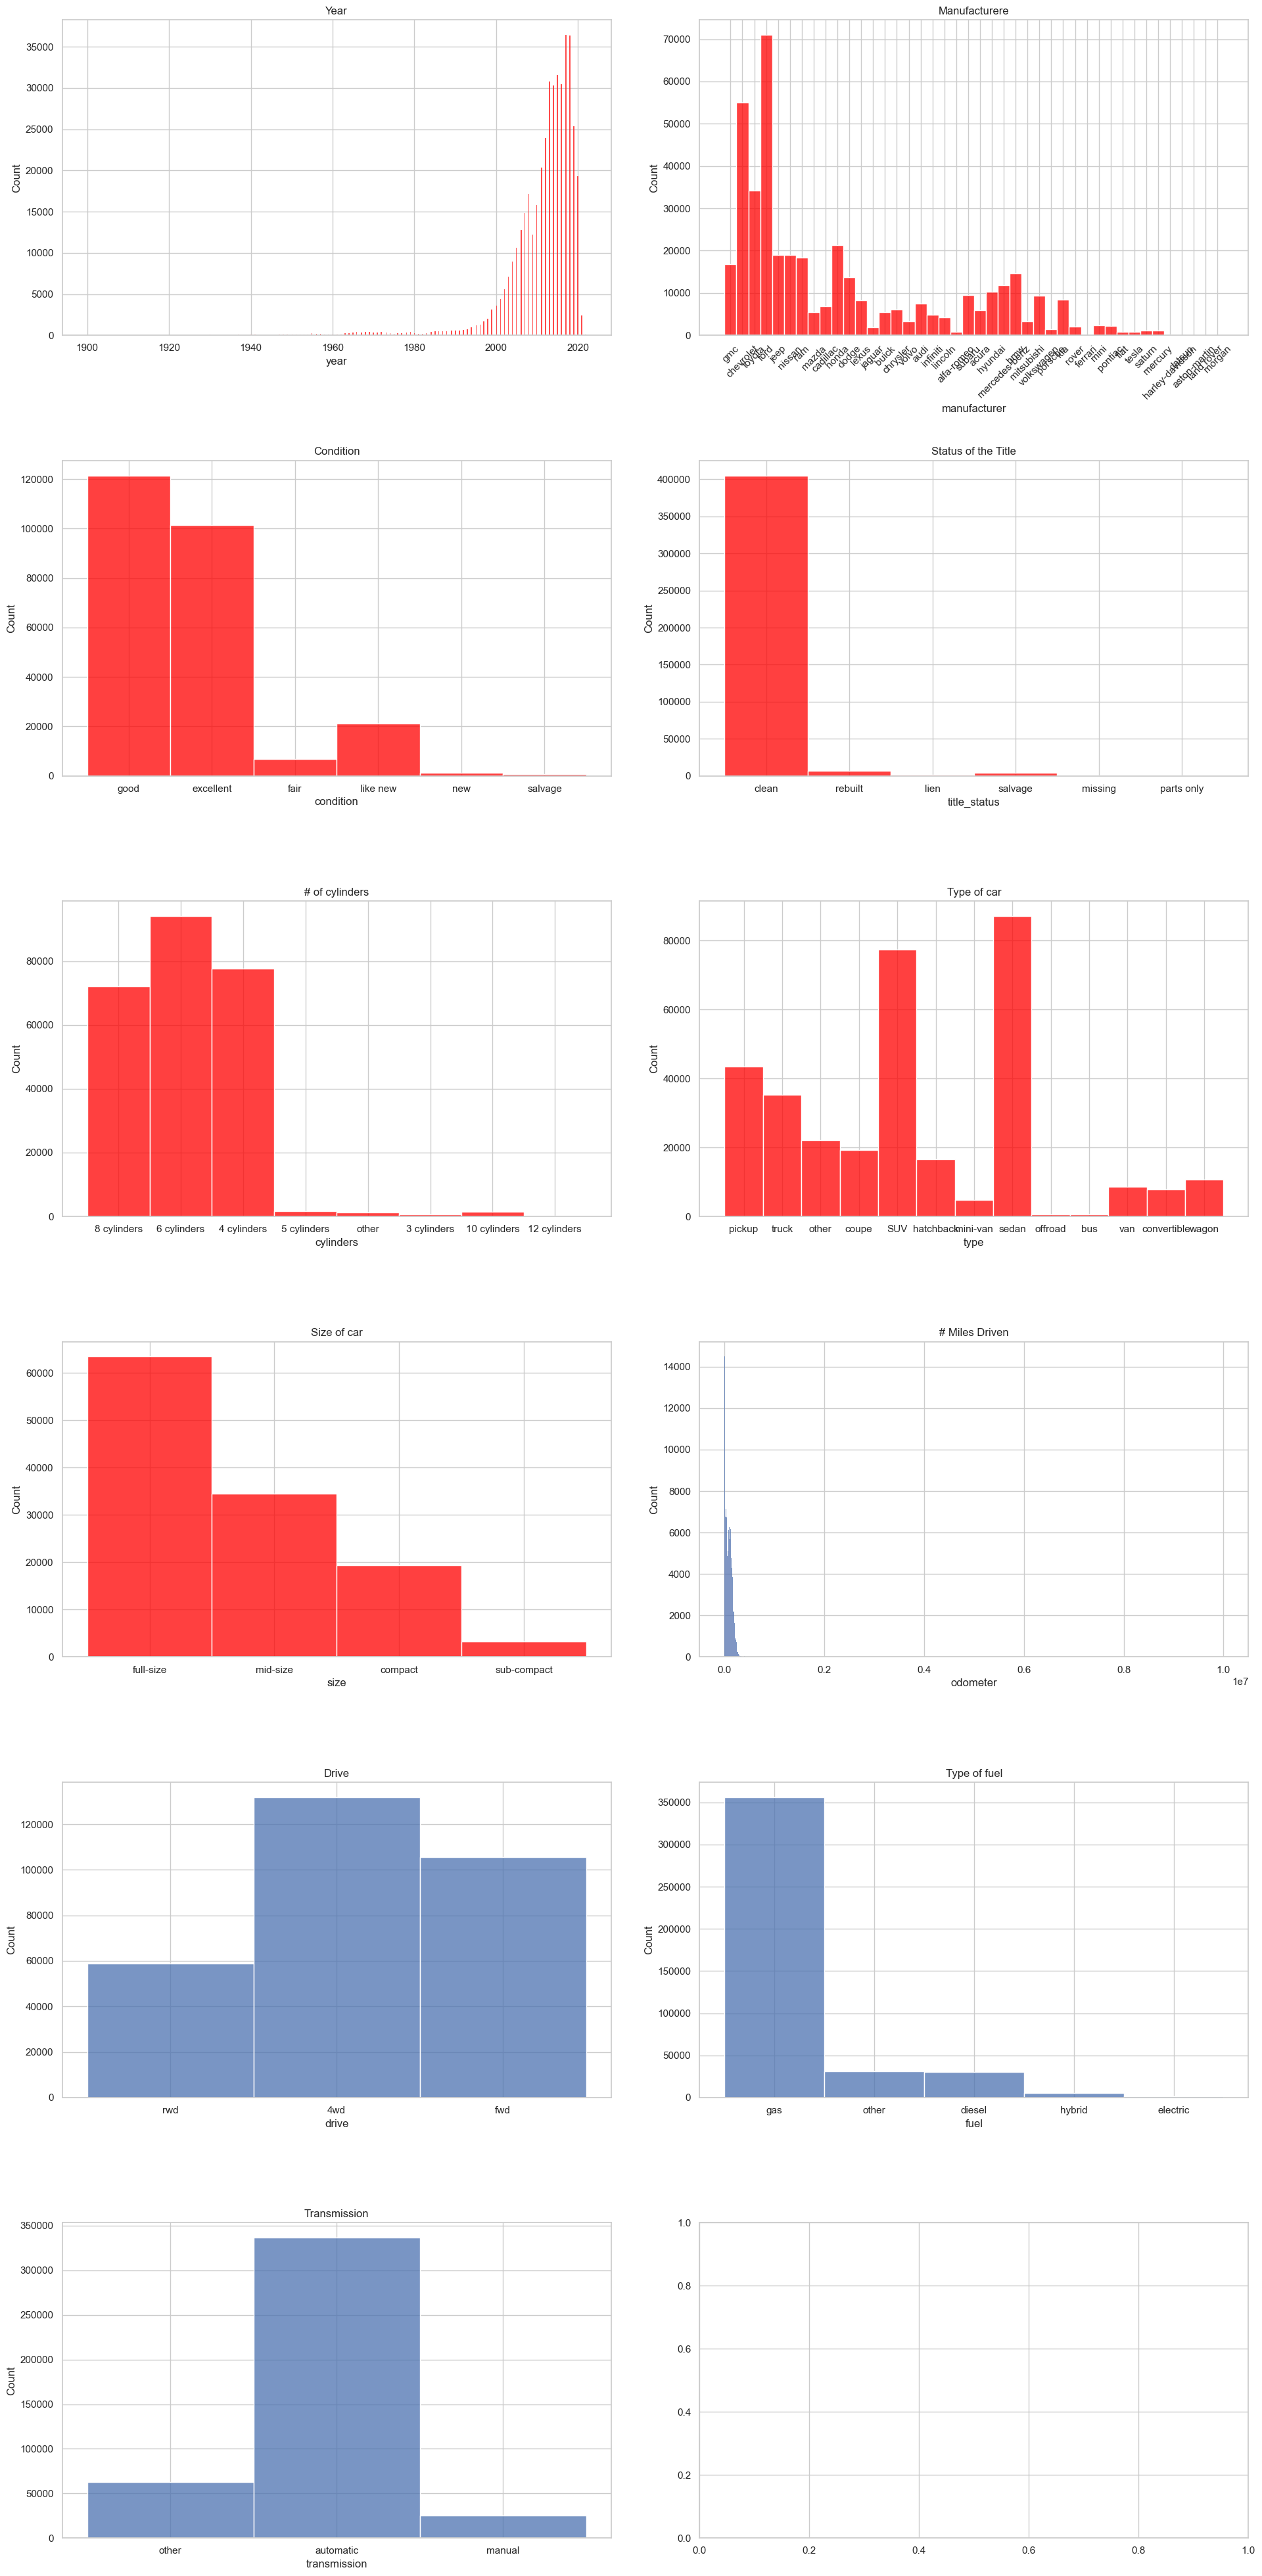

In [5]:
# Create a 2x2 grid for subplots

sns.set(style="whitegrid")  # Optional: set a seaborn style
fig, axes = plt.subplots(6, 2, figsize=(20, 40))
# Plot histograms on the subplots
sns.histplot(df['year'], kde=False, ax=axes[0, 0],color="red")
axes[0, 0].set_title("Year")

sns.histplot(df['manufacturer'], kde=False, ax=axes[0, 1],color="red")
# Change X label direction on the second subplot
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_title("Manufacturere")

sns.histplot(df['condition'], kde=False, ax=axes[1, 0],color="red")
axes[1, 0].set_title("Condition")

sns.histplot(df['title_status'], kde=False, ax=axes[1, 1],color="red")
axes[1, 1].set_title("Status of the Title")

sns.histplot(df['cylinders'], kde=False, ax=axes[2, 0],color="red")
axes[2, 0].set_title("# of cylinders")

sns.histplot(df['type'], kde=False, ax=axes[2, 1],color="red")
axes[2, 1].set_title("Type of car")

sns.histplot(df['size'], kde=False, ax=axes[3, 0],color="red")
axes[3, 0].set_title("Size of car")

sns.histplot(df['odometer'], kde=False, ax=axes[3, 1])
axes[3, 1].set_title("# Miles Driven")

sns.histplot(df['drive'], kde=False, ax=axes[4, 0])
axes[4, 0].set_title("Drive")

sns.histplot(df['fuel'], kde=False, ax=axes[4, 1])
axes[4, 1].set_title("Type of fuel")

sns.histplot(df['transmission'], kde=False, ax=axes[5, 0])
axes[5, 0].set_title("Transmission")
plt.tight_layout(pad=3.0)  

plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

Handle Missing values : either ignore rows with missing values OR update with appropriate value by analyzing other data
Also remove columns with excessive missing values
Remove Outliers : Remove data which is very far from majority of the data, very large or very small,unrealistic values (odometer more than few hundred thoudands, or clost zero for old cars.
Transform categorical features in to one hot encoding
Split the data into training and test datasets



In [6]:
# Missing values
print("\nMissing values:")
print(df.isnull().sum())
# Calculate percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display the percentage of missing values for each column
print("Percentage of missing values for each column:")
print(missing_percentage)


Missing values:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64
Percentage of missing values for each column:
id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


In [7]:
df.shape

(426880, 18)

In [8]:
#Lets update some data, We know if model is f150 then it must be truck. we can check any entry which has model as f150 adn type is missing
# we can update it as a truck. same for all the model and types

# Get unique types
unique_types = df['type'].unique()
# Iterate over each unique type
for type_val in unique_types:
    # Get distinct truck models for the current type
    models = df[df['type'] == type_val]['model'].unique()
    # Update type to truck for rows where model matches and type is NaN
    df.loc[df['model'].isin(models) & df['type'].isna(), 'type'] = type_val


In [9]:
# Filter the DataFrame for entries with odometer less than 50 and year less than 2021
print("Shape of the DataFrame before filtering:", df.shape)

df = df[(df['odometer'] >= 50) | (df['year'] >= 2021)]
print("Shape of the DataFrame after filtering:", df.shape)


Shape of the DataFrame before filtering: (426880, 18)
Shape of the DataFrame after filtering: (417527, 18)


In [10]:
print("Shape of the DataFrame before filtering:", df.shape)

df=df[(df['price']<50000) & (df['price']>500)]
print("Shape of the DataFrame after filtering:", df.shape)



Shape of the DataFrame before filtering: (417527, 18)
Shape of the DataFrame after filtering: (365484, 18)


In [11]:
print("Shape of the DataFrame before filtering:", df.shape)

## Production year only post 1995
df=df[(df['year']>1995)]
print("Shape of the DataFrame after filtering:", df.shape)


Shape of the DataFrame before filtering: (365484, 18)
Shape of the DataFrame after filtering: (349561, 18)


In [12]:
## Get rid of cars with different cylinders
print("Shape of the DataFrame before filtering:", df.shape)

df=df[(df['cylinders']!='other')]
df=df[(df['cylinders']!='12 cylinders')]
print("Shape of the DataFrame after filtering:", df.shape)


Shape of the DataFrame before filtering: (349561, 18)
Shape of the DataFrame after filtering: (348707, 18)


In [13]:
df['title_status'].value_counts()

title_status
clean         330908
rebuilt         6771
salvage         3490
lien            1275
missing          203
parts only        79
Name: count, dtype: int64

In [14]:
df['year'].value_counts()

year
2018.0    29403
2017.0    29229
2013.0    26929
2015.0    25897
2014.0    25502
2016.0    25071
2012.0    21338
2019.0    19607
2011.0    18247
2008.0    15755
2020.0    14513
2010.0    14306
2007.0    13659
2006.0    11704
2009.0    11225
2005.0     9848
2004.0     8385
2003.0     6720
2002.0     5189
2001.0     4165
2000.0     3304
1999.0     2900
1998.0     1873
1997.0     1599
1996.0     1198
2021.0     1103
2022.0       38
Name: count, dtype: int64

In [15]:
df['odometer'].value_counts()

odometer
200000.0    1446
150000.0    1325
160000.0    1121
140000.0    1103
100000.0    1032
            ... 
110548.0       1
85281.0        1
115666.0       1
173327.0       1
26892.0        1
Name: count, Length: 92742, dtype: int64

In [16]:
# Filter the DataFrame to exclude rows with prices below $1000
print("Shape of the DataFrame before removing rows:", df.shape)
df = df[df['price'] >= 1000]
# Print the shape of the DataFrame before and after removing rows
print("Shape of the DataFrame before removing rows:", df.shape)


Shape of the DataFrame before removing rows: (348707, 18)
Shape of the DataFrame before removing rows: (345856, 18)


In [17]:
print("Shape of the DataFrame before removing rows:", df.shape)
# Filter the DataFrame to exclude rows corresponding to cars older than 1995
df = df[df['year'] >= 1995]
# Print the shape of the DataFrame before and after removing rows
print("Shape of the DataFrame before removing rows:", df.shape)

Shape of the DataFrame before removing rows: (345856, 18)
Shape of the DataFrame before removing rows: (345856, 18)


In [18]:
# Filter the DataFrame to exclude rows with "parts only" values in the 'title_status' column
df = df[df['title_status'] != 'parts only']

In [19]:
# Drop Columns which are not meaningful for car price or has lots of missing values
df=df.drop(columns=['id', 'VIN', 'size', 'model', 'region', 'state', 'paint_color'], axis=1)
df.dropna(inplace=True)
print ("Ratio of the clean data vs original data = ", round((df.shape[0]/426879)*100, 2))
df.shape

Ratio of the clean data vs original data =  28.78


(122870, 11)

In [20]:
# USe One Hot Encoding for Categorical/Non numerical Features
from sklearn.preprocessing import LabelEncoder
# Perform one-hot encoding for all remaining categorical columns
df_encoded = pd.get_dummies(df, columns=[ 'condition','manufacturer', 'fuel', 'title_status', 'transmission', 'type'])

# Convert any remaining non-numeric columns to numeric using label encoding if needed
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

In [21]:
# print Final data rows to be used for modeling
df_encoded.shape


(122870, 75)

In [22]:
# Check If any Missing values
print("\nMissing values:")
print(df.isnull().sum())
# Calculate percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100




Missing values:
price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
dtype: int64


In [23]:
print (df_encoded.head(3))

# Separate features and target variable (if applicable)
X = df_encoded.drop(columns=['price'], axis=1)  # Drop target column if present
y = df_encoded['price']  # Extract target column if present

X = X.astype(int)

    price    year  cylinders  odometer  drive  condition_excellent  \
31  15000  2013.0          4  128000.0      2                 True   
32  27990  2012.0          5   68696.0      0                False   
33  34590  2016.0          4   29499.0      0                False   

    condition_fair  condition_good  condition_like new  condition_new  ...  \
31           False           False               False          False  ...   
32           False            True               False          False  ...   
33           False            True               False          False  ...   

    type_coupe  type_hatchback  type_mini-van  type_offroad  type_other  \
31       False           False          False         False       False   
32       False           False          False         False       False   
33       False           False          False         False       False   

    type_pickup  type_sedan  type_truck  type_van  type_wagon  
31        False       False        True  

In [24]:
from sklearn.model_selection import train_test_split

# Simple data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Simple Linear regression and Lasso regression models are implemnted
Also implemented ridge model

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
import numpy as np
import plotly.express as px
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [30]:

# Train the Model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

# Evaluate the Simple Model
y_pred = simple_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

# Calculate overall RMSE
overall_rmse = np.sqrt(mse)
print("Mean Squared Error:", mse, overall_rmse)

# Calculate the squared errors for each point
squared_errors = (y_test - y_pred) ** 2

# Calculate the RMSE for each point
point_rmse = np.sqrt(squared_errors)
print ("RMSE = ", point_rmse) 

Mean Squared Error: 36344705.92190526 6028.657057911427
RMSE =  268411    3111.354222
25400     5960.816390
258598    1352.798477
342317    6900.625949
106679      58.703660
             ...     
242549    1913.204852
152632    1777.002300
73658     6359.275737
422756    3863.861567
290334    7097.622591
Name: price, Length: 36861, dtype: float64


In [31]:
# Lasso Regression with hyperparameter tuning
pipe1 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=1, include_bias=False)),  
    ('scaler', StandardScaler()),  
    ('linear_regression', Lasso())  
])

# Define a grid of hyperparameters for tuning
grid1 = {
    'linear_regression__alpha': [1,10, 100]
     # Different values for Lasso's alpha (regularization strength)
}

# Set up GridSearchCV to find the best alpha
gs_lasso = GridSearchCV(pipe1, grid1, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)  
gs_lasso.fit(X_train, y_train)  

# Find the best model and evaluate
best_model_lasso = gs_lasso.best_estimator_
best_params_lasso = gs_lasso.best_params_

y_pred_lasso = best_model_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Calculate the squared errors for each point
squared_errors_lasso = (y_test - y_pred_lasso) ** 2
# Calculate the RMSE for each point
rmse_lasso = np.sqrt(squared_errors_lasso)

In [32]:



XX= df.drop(columns=['price'], axis=1)  # Drop target column if present
yy = df['price']  # Extract target column if present

Xx_train, Xx_test, yy_train, yy_test = train_test_split(XX, yy, random_state=42)


categorical_columns=[ 'condition','manufacturer','cylinders', 'fuel', 'title_status', 'transmission', 'type','drive']
numerical_columns = ["year", "odometer"]

preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), categorical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)

from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# List of alpha values for Ridge regularization
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Dictionary to store results
results = {}
for alpha in alphas: 
    model = make_pipeline(
      preprocessor,
      TransformedTargetRegressor(
        regressor=Ridge(alpha=alpha), func=np.log10, inverse_func=sp.special.exp10
     ),
    )

    model.fit(Xx_train, yy_train)
    mae_train = median_absolute_error(yy_train, model.predict(Xx_train))
    yy_pred = model.predict(Xx_test)
    mae_test = median_absolute_error(yy_test, yy_pred)

    results[alpha] = {
 #       'model': model,
        'mae_train': mae_train,
        'mae_test':  mae_test  
    }
    scores = {
    "MedAE on training set": f"{mae_train:.2f} ",
    "MedAE on testing set": f"{mae_test:.2f} ",
    }    
for alpha, result in results.items():
    print(f"Alpha: {str(alpha).ljust(10)} MAE_TRAIN: {result['mae_train']:.3f} MAE_TEST: {result['mae_test']:.3f}")
print (scores)







Alpha: 0.001      MAE_TRAIN: 5632.435 MAE_TEST: 5636.426
Alpha: 0.01       MAE_TRAIN: 5632.435 MAE_TEST: 5636.426
Alpha: 0.1        MAE_TRAIN: 5632.435 MAE_TEST: 5636.426
Alpha: 1          MAE_TRAIN: 5632.435 MAE_TEST: 5636.426
Alpha: 10         MAE_TRAIN: 5632.435 MAE_TEST: 5636.426
Alpha: 100        MAE_TRAIN: 5632.435 MAE_TEST: 5636.426
{'MedAE on training set': '5632.43 ', 'MedAE on testing set': '5636.43 '}


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Errors are Calculated and plotted for simple regression and lasso models

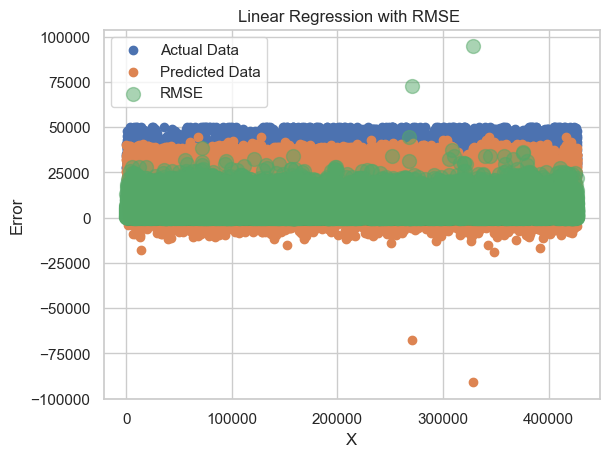

In [36]:

# Scatter plot of actual data
plt.scatter(X_test.index, y_test, label='Actual Data')
# Line plot for predicted data
plt.scatter(X_test.index, y_pred, label='Predicted Data')
# Scatter plot of RMSE values
plt.scatter(X_test.index, point_rmse, label='RMSE', s=100, alpha=0.5)

plt.xlabel("X")
plt.ylabel("Error")
plt.title("Linear Regression with RMSE ")
plt.legend()
plt.show()

Lasso Regression : BEST PARAMETERS :: {'linear_regression__alpha': 1}
Lasso Regression : MSE & Root RMSE :: 36344889.76716997 6028.67230550558


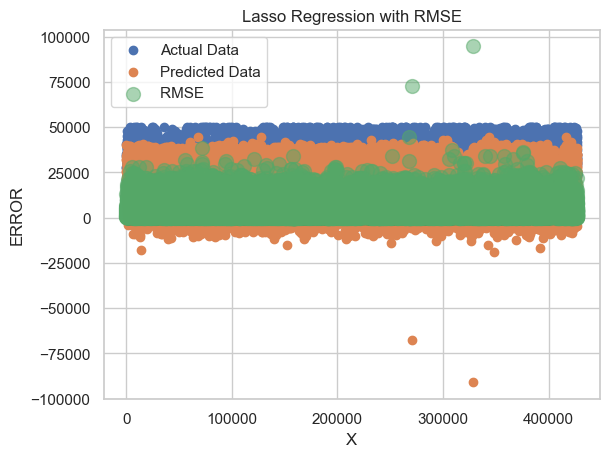

In [37]:
print("Lasso Regression : BEST PARAMETERS ::", best_params_lasso)
print("Lasso Regression : MSE & Root RMSE ::", mse_lasso, np.sqrt(mse_lasso))

# Scatter plot of actual data
plt.scatter(X_test.index, y_test, label='Actual Data')
# Line plot for predicted data
plt.scatter(X_test.index, y_pred_lasso, label='Predicted Data')
# Scatter plot of RMSE values
plt.scatter(X_test.index, rmse_lasso, label='RMSE ',  s=100, alpha=0.5)

plt.xlabel("X")
plt.ylabel("ERROR")
plt.title("Lasso Regression with RMSE" )
plt.legend()
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.



In [38]:

from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(best_model_lasso, X_test, y_test, n_repeats=10, random_state=42)

# Get feature names
feature_names = X_test.columns

# Sort features by their importance
sorted_indices = perm_importance.importances_mean.argsort()[::-1]

# Print the permutation importance of each feature
print("Permutation Importance:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {perm_importance.importances_mean[i]:.4f} +/- {perm_importance.importances_std[i]:.4f}")





Permutation Importance:
year: 0.6502 +/- 0.0054
cylinders: 0.0955 +/- 0.0009
fuel_diesel: 0.0542 +/- 0.0005
transmission_automatic: 0.0417 +/- 0.0009
type_truck: 0.0328 +/- 0.0005
transmission_other: 0.0231 +/- 0.0007
type_sedan: 0.0199 +/- 0.0005
odometer: 0.0197 +/- 0.0005
type_pickup: 0.0143 +/- 0.0004
type_convertible: 0.0071 +/- 0.0003
manufacturer_nissan: 0.0063 +/- 0.0003
type_coupe: 0.0055 +/- 0.0002
manufacturer_toyota: 0.0041 +/- 0.0002
title_status_clean: 0.0041 +/- 0.0002
manufacturer_chrysler: 0.0037 +/- 0.0002
manufacturer_lexus: 0.0037 +/- 0.0001
manufacturer_hyundai: 0.0036 +/- 0.0003
type_hatchback: 0.0032 +/- 0.0002
manufacturer_kia: 0.0030 +/- 0.0001
manufacturer_mercedes-benz: 0.0030 +/- 0.0002
manufacturer_dodge: 0.0029 +/- 0.0002
manufacturer_porsche: 0.0027 +/- 0.0002
transmission_manual: 0.0026 +/- 0.0002
condition_fair: 0.0024 +/- 0.0003
type_mini-van: 0.0024 +/- 0.0001
manufacturer_volkswagen: 0.0020 +/- 0.0001
manufacturer_jeep: 0.0014 +/- 0.0001
condition_li

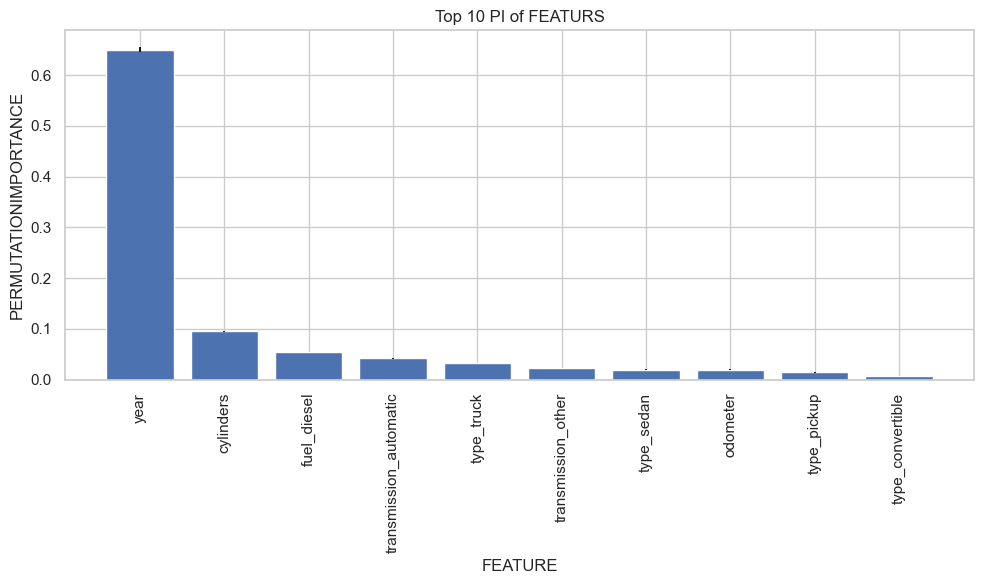

In [39]:
# Plot the permutation importance of top N=10 features
N = 10  
feature_indices = sorted_indices[:N]
feature_names = [feature_names[i] for i in feature_indices]
importances = perm_importance.importances_mean[feature_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(N), importances, yerr=perm_importance.importances_std[feature_indices])
plt.xticks(range(N), feature_names, rotation=90)
plt.xlabel('FEATURE')
plt.ylabel('PERMUTATIONIMPORTANCE')
plt.title(f'Top {N} PI of FEATURS')
plt.tight_layout()
plt.show()

In [40]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(simple_model, X_test, y_test, n_repeats=10, random_state=42)

# Get feature names
feature_names = X_test.columns

# Sort features by their importance
sorted_indices = perm_importance.importances_mean.argsort()[::-1]

# Print the permutation importance of each feature
print("Permutation Importance:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {perm_importance.importances_mean[i]:.4f} +/- {perm_importance.importances_std[i]:.4f}")




Permutation Importance:
year: 0.6501 +/- 0.0054
cylinders: 0.0953 +/- 0.0009
type_sedan: 0.0434 +/- 0.0008
transmission_other: 0.0335 +/- 0.0009
transmission_automatic: 0.0280 +/- 0.0008
fuel_diesel: 0.0275 +/- 0.0004
odometer: 0.0197 +/- 0.0005
type_truck: 0.0168 +/- 0.0004
type_SUV: 0.0097 +/- 0.0005
fuel_gas: 0.0083 +/- 0.0003
type_hatchback: 0.0073 +/- 0.0003
manufacturer_nissan: 0.0068 +/- 0.0004
type_mini-van: 0.0054 +/- 0.0002
type_pickup: 0.0045 +/- 0.0002
manufacturer_chrysler: 0.0039 +/- 0.0002
manufacturer_hyundai: 0.0039 +/- 0.0003
type_convertible: 0.0039 +/- 0.0002
manufacturer_toyota: 0.0036 +/- 0.0002
manufacturer_lexus: 0.0034 +/- 0.0001
manufacturer_kia: 0.0033 +/- 0.0001
manufacturer_dodge: 0.0031 +/- 0.0002
manufacturer_mercedes-benz: 0.0028 +/- 0.0002
manufacturer_porsche: 0.0027 +/- 0.0002
condition_like new: 0.0026 +/- 0.0002
fuel_hybrid: 0.0023 +/- 0.0002
manufacturer_volkswagen: 0.0022 +/- 0.0001
title_status_clean: 0.0018 +/- 0.0002
condition_fair: 0.0017 +/- 

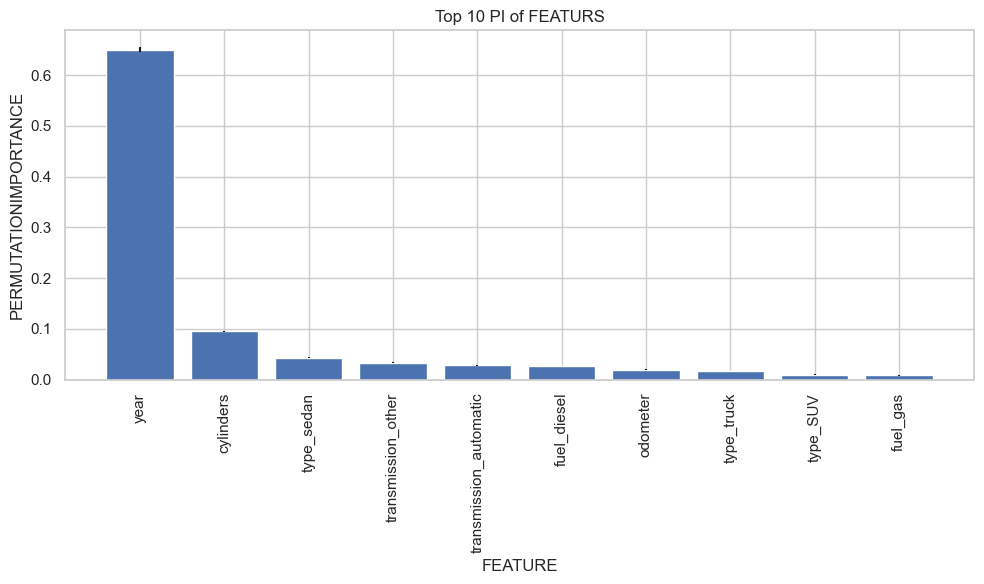

In [41]:
# Plot the permutation importance of top N=10 features
N = 10  
feature_indices = sorted_indices[:N]
feature_names = [feature_names[i] for i in feature_indices]
importances = perm_importance.importances_mean[feature_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(N), importances, yerr=perm_importance.importances_std[feature_indices])
plt.xticks(range(N), feature_names, rotation=90)
plt.xlabel('FEATURE')
plt.ylabel('PERMUTATIONIMPORTANCE')
plt.title(f'Top {N} PI of FEATURS')
plt.tight_layout()
plt.show()

Findings
For both linear regression and lasso regression , Year and Cyllinder contributes to the price of the car.

Next steps
column model has lots of data which could be filtered properly so number of uniq values could be reducded.

I tried to run with more filter with preserved data but ended up getting memory errors.
